# Cheat sheet for altair
Cheat sheet for plotting library altair. Base on following tutorial by Jake VanderPlas:<br>
https://github.com/altair-viz/altair-tutorial/tree/master/notebooks

Video demo: https://youtu.be/ms29ZPUKxbU?t


In [1]:
import altair as alt
from vega_datasets import data

## Basics

In [2]:
# If run in classica notebooks instead of Jupyter lab
#alt.renderers.enable('notebook')

### Encodings

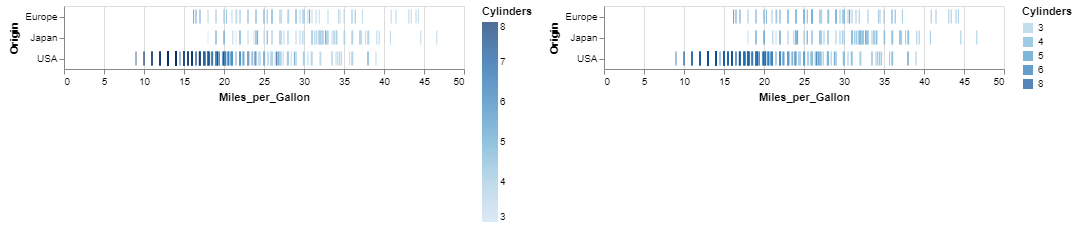

In [4]:
cars = data.cars()
chart1 = alt.Chart(cars).mark_tick().encode(
    x='Miles_per_Gallon',
    y='Origin',
    color='Cylinders'
)

chart2 = alt.Chart(cars).mark_tick().encode(
    x='Miles_per_Gallon:Q',
    y='Origin:N',
    color='Cylinders:O'
)

chart1 | chart2

## Cook book viz

### Related scatter charts

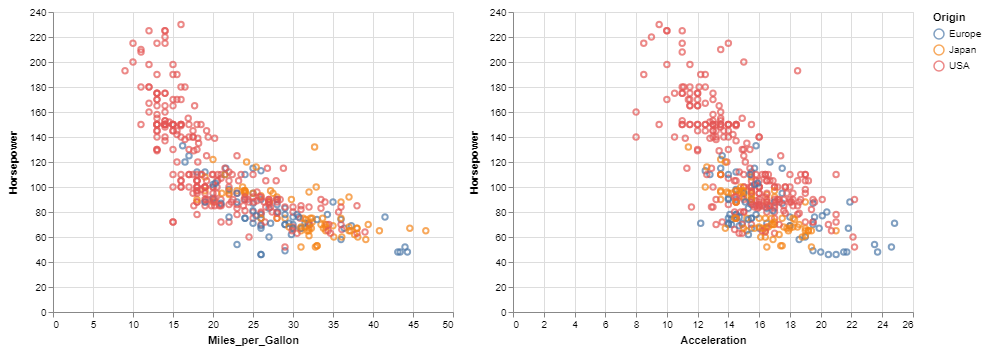

In [6]:
cars = data.cars()

interval = alt.selection_interval(encodings=['x','y'])

chart = alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip='Name'
).properties(
    selection=interval
)

chart | chart.encode(x='Acceleration')

### Related scatter and bar charts

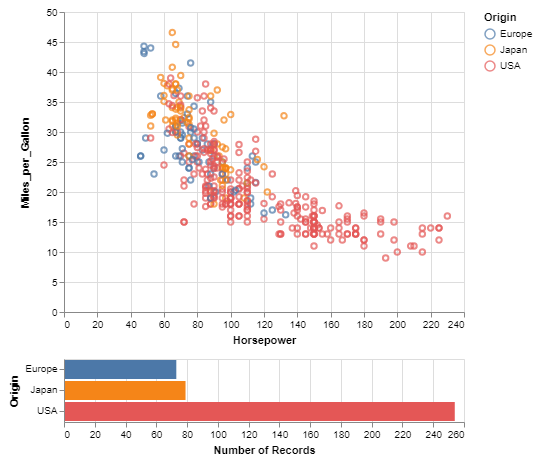

In [12]:
click = alt.selection_multi(encodings=['color'])
interval = alt.selection_interval(encodings=['x','y'])

scatter = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N',
    tooltip='Name'
).transform_filter(
    click
).properties(
    selection=interval
)

hist = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color=alt.condition(click, 'Origin', alt.value('lightgray'))
).properties(
    selection=click
).transform_filter(
    interval
)

scatter & hist

### Dashboard-like time series chart

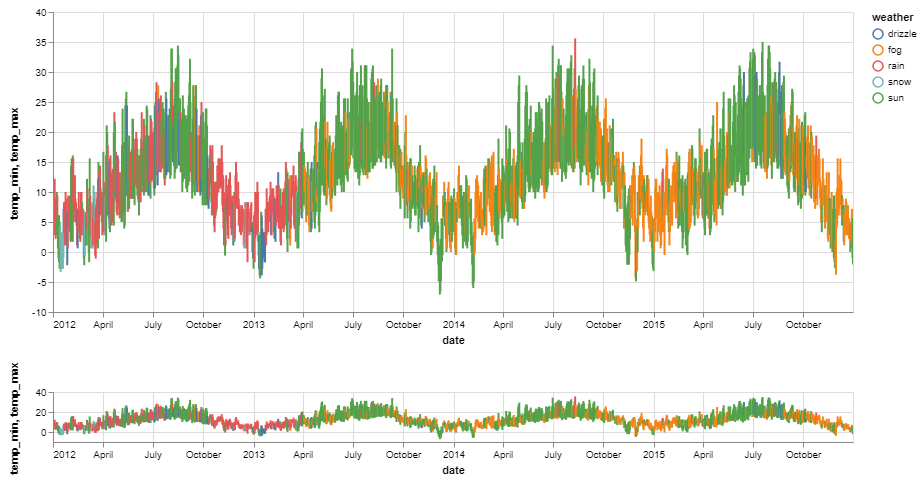

In [8]:
weather = data.seattle_weather()

interval = alt.selection_interval(encodings=['x'])

base = alt.Chart(weather).mark_rule(size=2).encode(
    x='date:T',
    y='temp_min:Q',
    y2='temp_max:Q',
    color='weather:N'
)

chart = base.properties(
    width=800,
    height=300
).encode(
    x=alt.X('date:T', scale=alt.Scale(domain=interval.ref()))
)

view = chart.properties(
    width=800,
    height=50,
    selection=interval
)

chart & view